### ***Cat and Dog Image Classifier***

In the realm of computer vision, the ability to distinguish between different objects within images is a fundamental challange. One such task is the classification of images into distinct categories, a task that has seen significant advancements with the aid of machine learning technique. This project focuses on building an image classifier capable of accurately differentiating between images of cats and dogs.

**Fetching** **data** **from** **kaggle**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


The data that we have is in zip format so now we'll unzip the data

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Importing** **required** **libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Here, we'll use generators to divide data in different batches.

so, what are generators ?
In the context of python programming and particulary when dealing with data processing, generators are a type of iterable object that can be used to generate a sequence of values dynamically. They provide a way to iterate over large or potentially infinite sequences without needing to store them in memory all at once.

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


the each array that we have is of value from 0 to 255 and we need to make that value to 0 to 1 so we'll normalizing it to get the better result of our model.

In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**CNN** **Model**

In [ ]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,3),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,3),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,3),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 124, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 124, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.3636 - accuracy: 0.6043 - val_loss: 0.8392 - val_accuracy: 0.6134
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6082 - accuracy: 0.6926 - val_loss: 0.5231 - val_accuracy: 0.7404
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4981 - accuracy: 0.7598 - val_loss: 0.4792 - val_accuracy: 0.7762
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4440 - accuracy: 0.7955 - val_loss: 0.4915 - val_accuracy: 0.7596
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3941 - accuracy: 0.8259 - val_loss: 0.4610 - val_accuracy: 0.7798
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3501 - accuracy: 0.8458 - val_loss: 0.4569 - val_accuracy: 0.8124
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2867 - accuracy: 0.8769 - val_loss: 0.7153 - val_ac

Plotting graphs to see the result of training

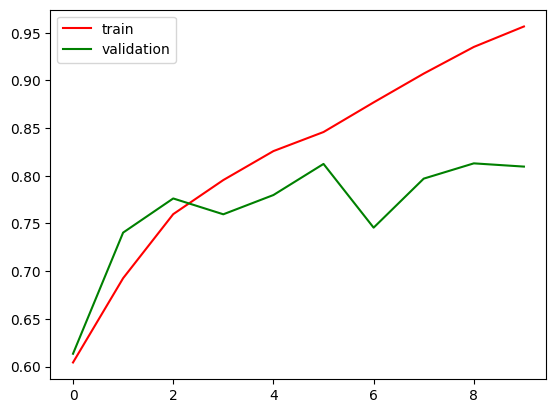

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

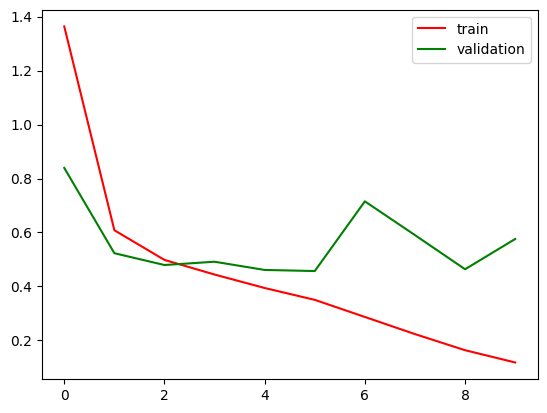

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()


**Testing** **the** **given** **image**




In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

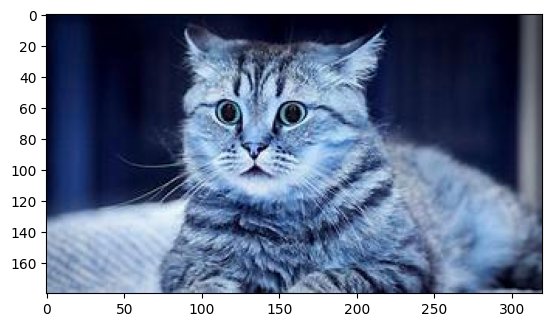

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(180, 320, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 389ms/step


array([[0.]], dtype=float32)

**Conclusion**

As we can see from above code that it is giving as array([[0]]) position because the 1st input we have put is cat image and 2nd is dog image so 0 index for cat image and 1 for dg image.